# Mezcla de Gaussianas

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def p_x(x, media, varianza):
    n = len(x)
    coef = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(varianza) ** 0.5)
    exponent = -0.5 * np.dot(np.dot((x - media).T, np.linalg.inv(varianza)), (x - media))
    return coef * np.exp(exponent)

def MG(datos, k, iteraciones):
    n, m = datos.shape
    medias = datos[np.random.choice(n, k, replace=False)]
    varianzas =  [np.eye(m) for _ in range(k)]
    pesos = np.ones(k) / k

    for i in range(iteraciones):
        # Expectation
        probabilidades = np.zeros((n, k))
        for j in range(n):
            for l in range(k):
              probabilidades[j][l] = pesos[l] * p_x(datos[j], medias[l], varianzas[l])

        probabilidades /= probabilidades.sum(axis=1, keepdims=True)
        cluster_asignados = np.argmax(probabilidades, axis=1)
        # Maximization
        total_probabilidades = probabilidades.sum(axis=0)
        for j in range(k):
            medias[j] = np.dot(probabilidades[:, j], datos) / total_probabilidades[j]
            data_in_cluster = datos[cluster_asignados == j]
            varianzas[j] = np.cov(data_in_cluster, rowvar=False, bias=True)
            varianzas[j] = np.maximum(varianzas[j], np.finfo(float).eps)
            pesos[j] = total_probabilidades[j] / n

    return cluster_asignados, medias


In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_clusters(datos, cluster_asignados, medias):
    plt.figure(figsize=(8, 6))
    for i in range(len(medias)):
        plt.scatter(datos[cluster_asignados == i, 0], datos[cluster_asignados == i, 1], label=f'Cluster {i + 1}')
        plt.scatter(medias[i][0], medias[i][1], marker='o', s=200, c='red', label=f'Media Cluster {i + 1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.legend()
    plt.title('Puntos Clusterizados')
    plt.show()

# Clasificación de Puntos

In [5]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import cluster, datasets, mixture

# Datos sinteticos
X1, _ = make_blobs(n_samples=10000, centers=40, random_state=0)
X2, _ = make_moons(n_samples=2000, noise=0.05, random_state=0)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X3 = np.concatenate((x1,x2,x3),axis=0)
X4, _ = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

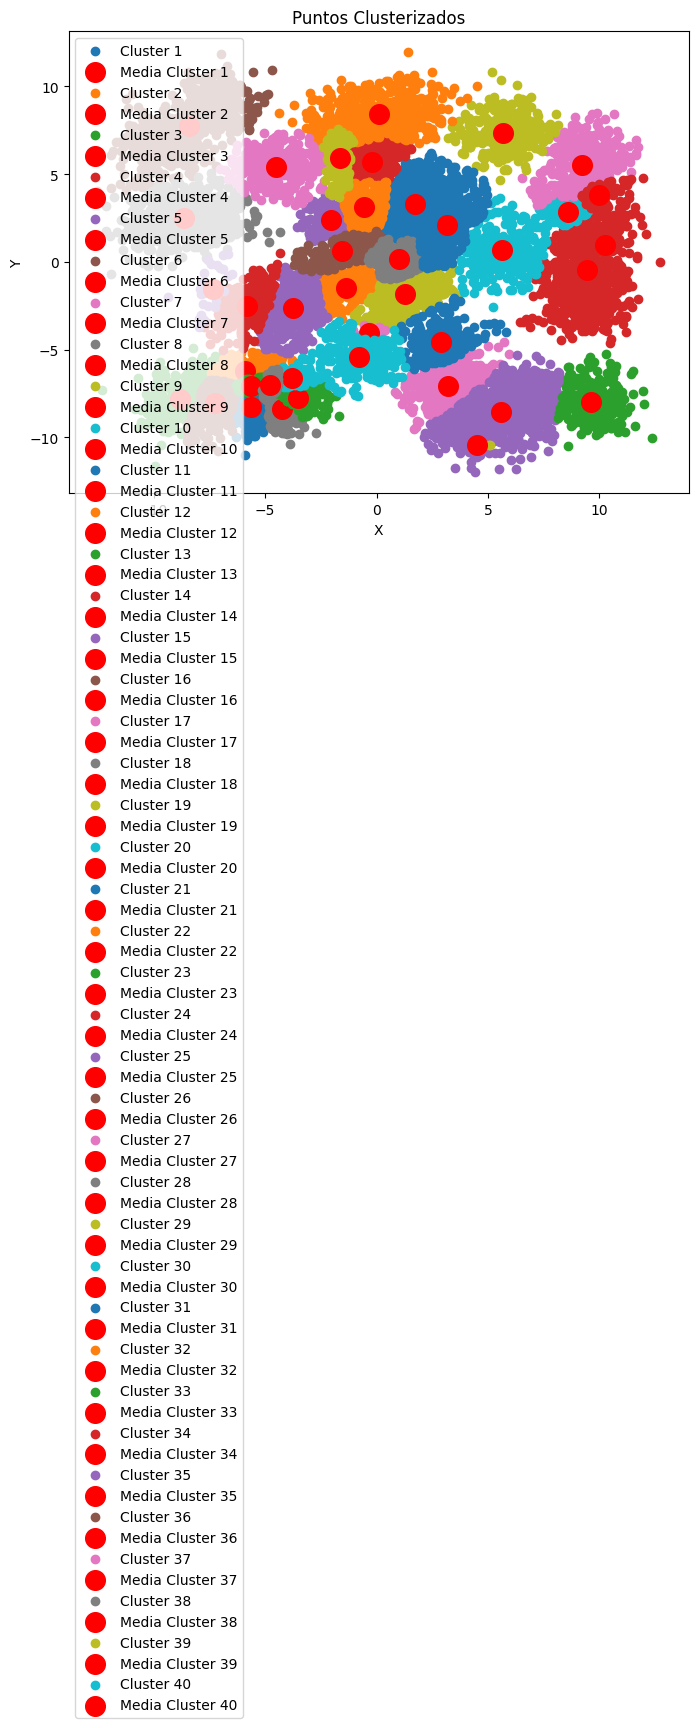

In [7]:
cluster, medias = MG(X1, 40, 10)
plot_clusters(X1, cluster, medias)

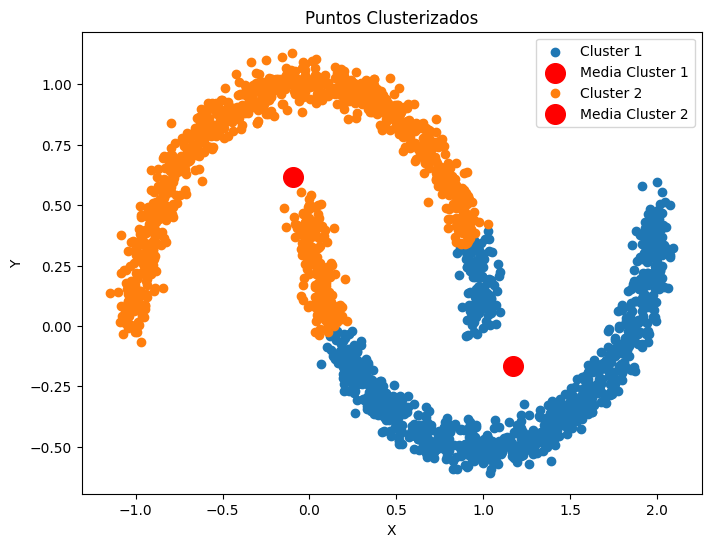

In [103]:
cluster, medias = MG(X2, 2, 10)
plot_clusters(X2, cluster, medias)

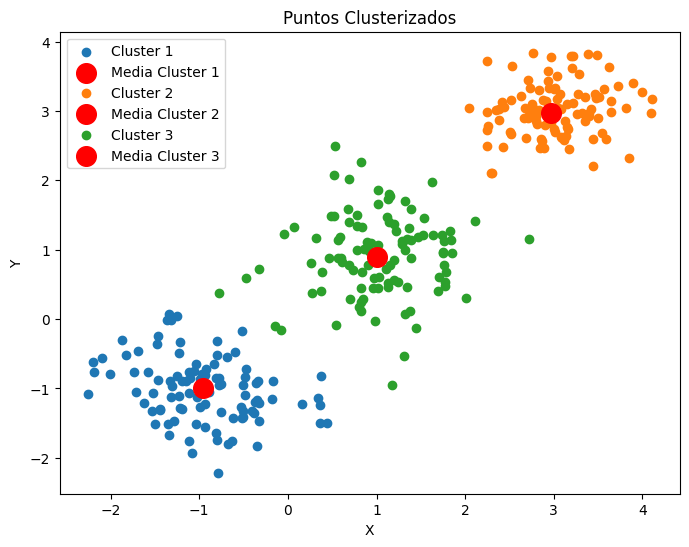

In [110]:
cluster,medias = MG(X3, 3, 1)
plot_clusters(X3, cluster, medias)

[0 1]


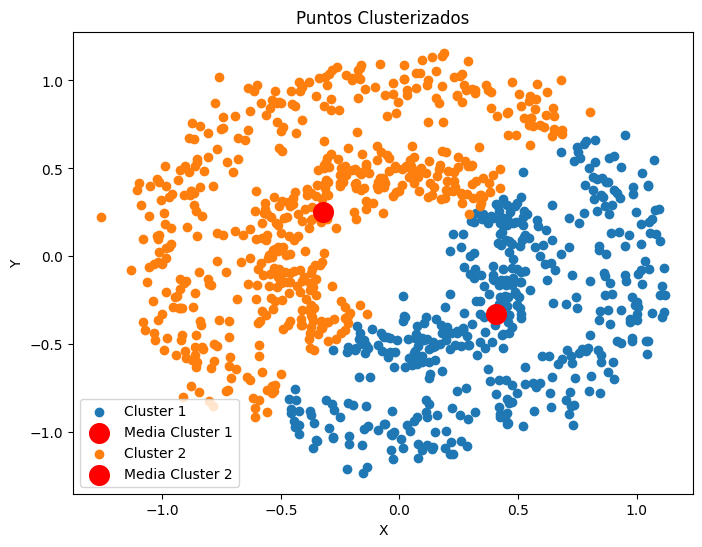

In [115]:
cluster, medias = MG(X4, 2, 100)
unique_labels = np.unique(cluster)
print(unique_labels)
plot_clusters(X4, cluster, medias)

# Clasificación numeros

In [23]:
# Cargamos los datos
from sklearn.datasets import load_digits
import cv2
from google.colab.patches import cv2_imshow

np.random.seed(1)
digits = load_digits()
data = digits.data
data = 255-data

In [35]:
# Aplicamos MG
cluster, medias = MG(data, 10, 10)

<ipython-input-34-cca72e6b94de>:24: RuntimeWarning: invalid value encountered in divide
  probabilidades /= probabilidades.sum(axis=1, keepdims=True)
<ipython-input-34-cca72e6b94de>:7: RuntimeWarning: divide by zero encountered in double_scalars
  coef = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(varianza) ** 0.5)


LinAlgError: ignored

In [32]:
print(cluster)
unique_labels = np.unique(cluster)
print(unique_labels)

[0 0 0 ... 0 0 0]
[0]


# Reducción de tamaño

In [36]:
# Cargamos la imagen
# Especifica la ruta de la imagen que deseas leer
ruta_imagen = 'holi.jpg'

# Utiliza la función cv2.imread() para cargar la imagen
imagen = cv2.imread(ruta_imagen)


# Obtener las dimensiones de la imagen
h, w, _ = imagen.shape

# Preparar los datos para K-Means
B = imagen[:, :, 0].reshape(-1, 1)
G = imagen[:, :, 1].reshape(-1, 1)
R = imagen[:, :, 2].reshape(-1, 1)
X = np.concatenate((R, G, B), axis=1)

# Imprimir el número de píxeles
num_pixels = w * h
print('Número de pixels  =', num_pixels)

Número de pixels  = 5600


In [39]:
# Aplicamos MG
K = 30
cluster, medias = MG(X, K, 1)


<class 'numpy.ndarray'>


<ipython-input-34-cca72e6b94de>:24: RuntimeWarning: invalid value encountered in divide
  probabilidades /= probabilidades.sum(axis=1, keepdims=True)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-34-cca72e6b94de>:31: RuntimeWarning: Degrees of freedom <= 0 for slice
  varianzas[j] = np.cov(data_in_cluster, rowvar=False, bias=True)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [40]:
print(type(cluster))
print(cluster)

<class 'numpy.ndarray'>
[20 20 20 ...  7  7  7]


In [45]:
from PIL import Image
import cv2
# Recuperamos la nueva imagen
for j in range(K):
  # Valor p
  p = medias[j]
  resultante = np.copy(X)
  cluster_j = cluster.tolist()

  # Iterar a través de los elementos de cluster_j
  for i in range(len(cluster_j)):
    elemento_A = cluster_j[i]
    # Verificar si el elemento de cluster_j está en X
    coincidencias = np.all(X == elemento_A, axis=1)
    if np.any(coincidencias):
      # Obtener los índices de las coincidencias
      indices_coincidencias = np.where(coincidencias)[0]
      # Reemplazar los elementos en X por p
      for idx in indices_coincidencias:
        resultante[idx, :] = p
  X = np.copy(resultante)

# Crear un objeto de imagen RGB vacío con las dimensiones deseadas
imagen = Image.new("RGB", (w, h))

# Llenar la imagen con los píxeles de la matriz
imagen_array = np.array(imagen)
for fila in range(min(w * h, len(X))):
    pixel = tuple(X[fila])
    x, y = fila % w, fila // w
    imagen_array[y, x] = pixel

# Crear una imagen PIL a partir del arreglo de píxeles
imagen = Image.fromarray(imagen_array, "RGB")

# Mostrar la imagen o guardarla en un archivo
imagen.show()
imagen.save("reducido-MG.png")

# Segmentación imagenes

In [46]:
# Cargamos la imagen y la convertimos BN
I = Image.open("Cerebro.jpeg")
I1 = I.convert('L')
I2 = np.asarray(I1,dtype=np.float)
h, w = I.size
# La convertimos para ponerla en la funcion k-means
X = I2.reshape((-1, 1))

<ipython-input-46-38c6495573e2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I2 = np.asarray(I1,dtype=np.float)


In [47]:
# Aplicamos K-means
K = 3
cluster, medias = MG(X, K, 1)

<ipython-input-34-cca72e6b94de>:24: RuntimeWarning: invalid value encountered in divide
  probabilidades /= probabilidades.sum(axis=1, keepdims=True)


In [48]:
from PIL import Image
import cv2
# Recuperamos la nueva imagen
for j in range(K):
  # Valor p
  p = medias[j]
  resultante = np.copy(X)
  cluster_j = cluster.tolist()

  # Iterar a través de los elementos de cluster_j
  for i in range(len(cluster_j)):
    elemento_A = cluster_j[i]
    # Verificar si el elemento de cluster_j está en X
    coincidencias = np.all(X == elemento_A, axis=1)
    if np.any(coincidencias):
      # Obtener los índices de las coincidencias
      indices_coincidencias = np.where(coincidencias)[0]
      # Reemplazar los elementos en X por p
      for idx in indices_coincidencias:
        resultante[idx, :] = p
  X = np.copy(resultante)

# Crear un objeto de imagen RGB vacío con las dimensiones deseadas
imagen = Image.new("RGB", (w, h))

# Llenar la imagen con los píxeles de la matriz
imagen_array = np.array(imagen)
for fila in range(min(w * h, len(X))):
    pixel = tuple(X[fila])
    x, y = fila % w, fila // w
    imagen_array[y, x] = pixel

# Crear una imagen PIL a partir del arreglo de píxeles
imagen = Image.fromarray(imagen_array, "RGB")

# Mostrar la imagen o guardarla en un archivo
imagen.show()
imagen.save("cerebro-MG.png")